In [27]:
# ========================
# 1. Import Libraries
# ========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [28]:
# ========================
# 2. Load Dataset
# ========================

import pandas as pd

# Update this path to where your file is stored in Drive
file_path = '/content/Dataset_ATS_v2.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
print(df.head())


   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      41          Yes            No   
2  Female              0        Yes      52          Yes            No   
3  Female              0         No       1          Yes            No   
4    Male              0         No      67          Yes            No   

  InternetService        Contract  MonthlyCharges Churn  
0             DSL  Month-to-month              25   Yes  
1             DSL        One year              25    No  
2             DSL  Month-to-month              19    No  
3             DSL        One year              76   Yes  
4     Fiber optic  Month-to-month              51    No  


In [29]:
# 3. Detect Categorical Columns
# ========================
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns detected:", categorical_columns)

Categorical columns detected: ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn']


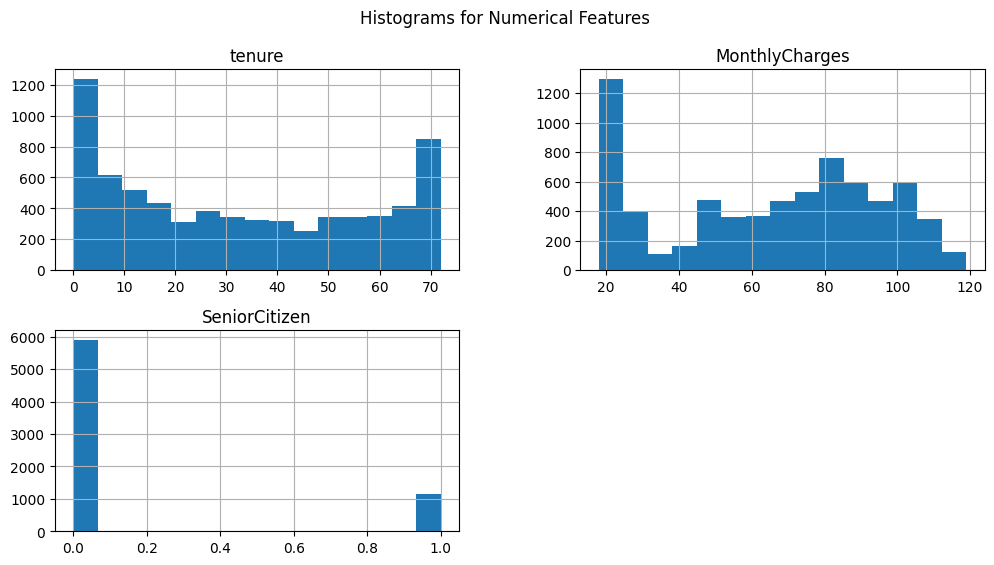

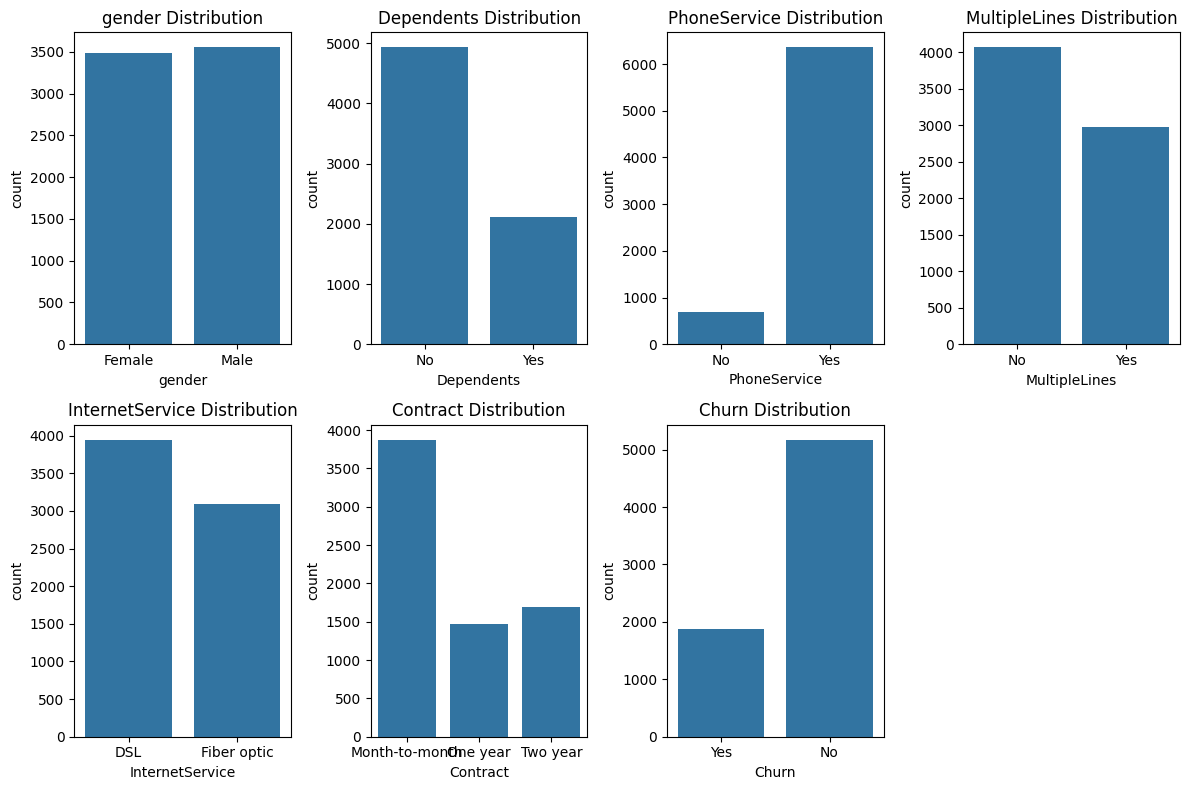

In [30]:
# Plot histogram for numerical variables
numerical_cols = ['tenure', 'MonthlyCharges', 'SeniorCitizen']
df[numerical_cols].hist(bins=15, figsize=(12, 6))
plt.suptitle("Histograms for Numerical Features")
plt.show()

# Visualize the distribution of encoded categorical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

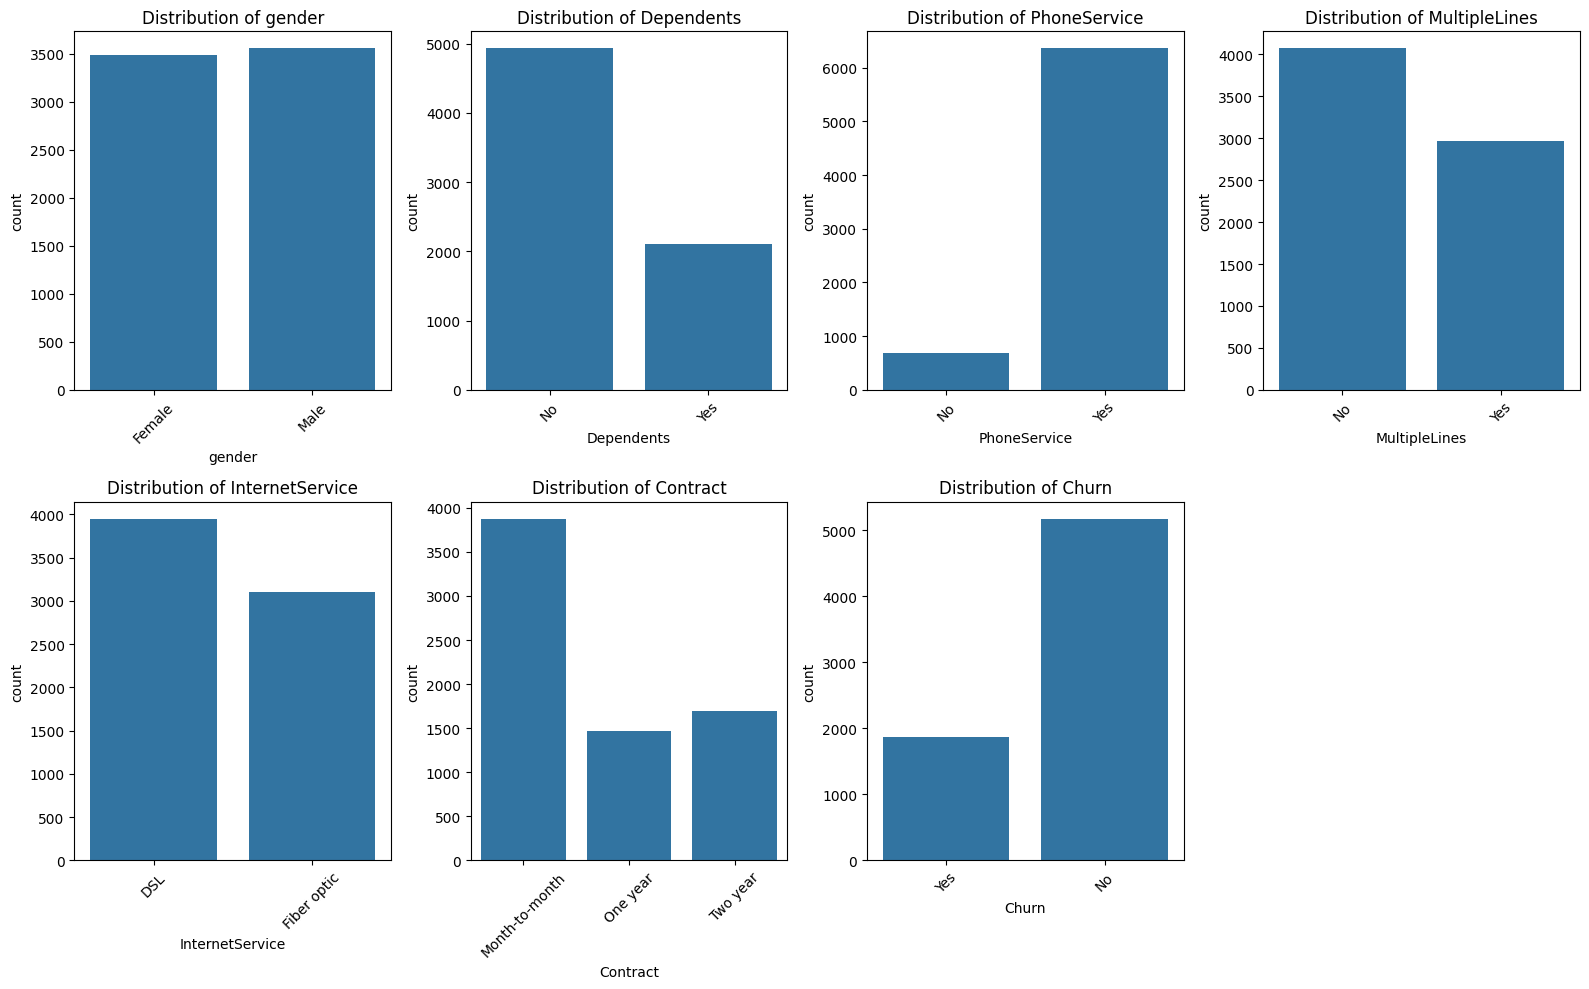

In [31]:
# 4. Visualize Categorical Columns
# ========================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)  # Adjust rows/cols if you have more than 8 columns
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

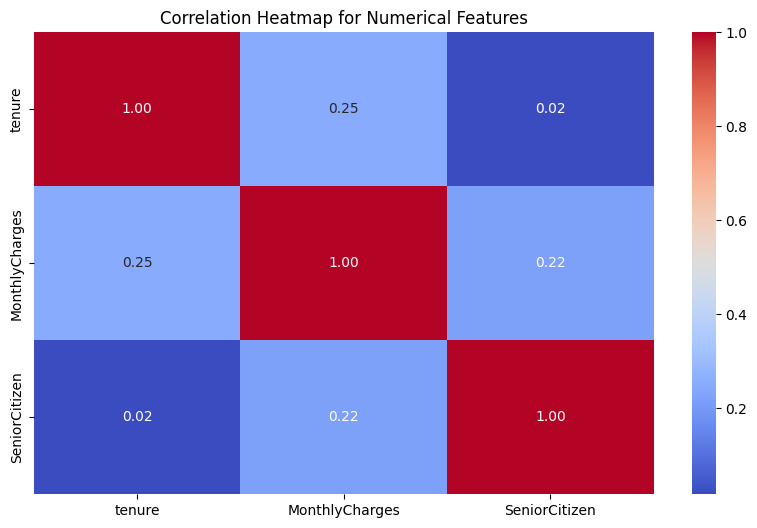

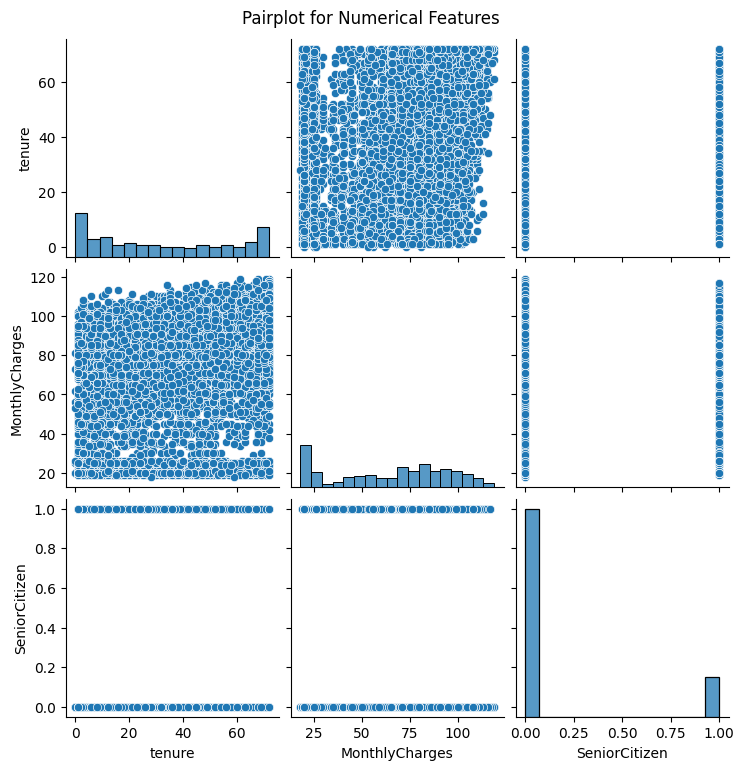

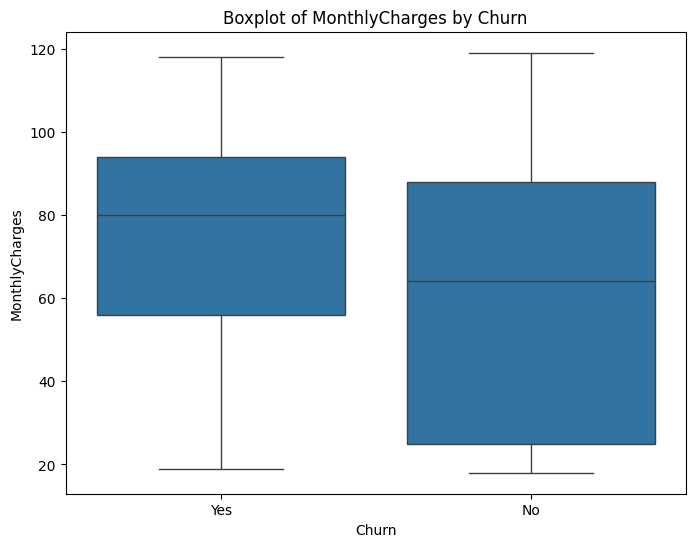

In [32]:
# ========================
# 5. Bivariate Analysis
# ========================

# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot for Numerical Features", y=1.02)
plt.show()

# Boxplot to compare 'MonthlyCharges' across 'Churn' (categorical feature)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Boxplot of MonthlyCharges by Churn")
plt.show()

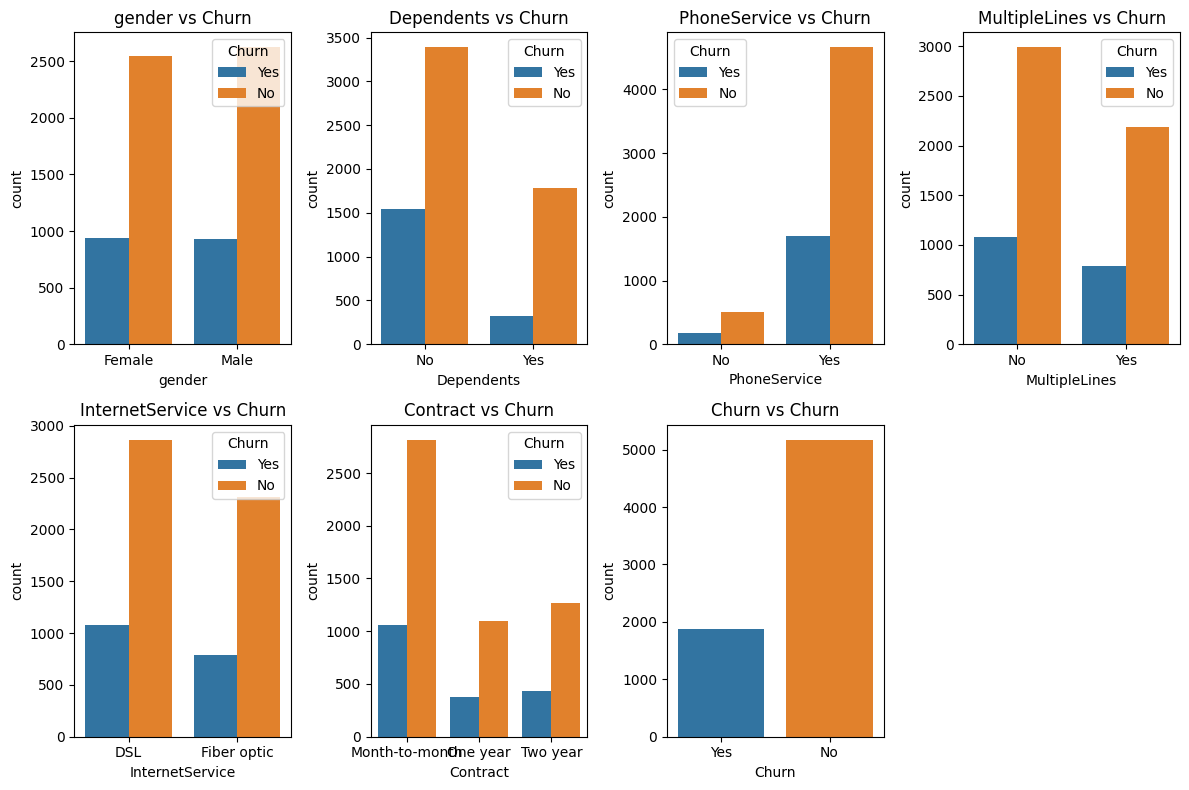

In [33]:
# ========================
# 6. Feature Relationships
# ========================

# Countplot for Churn vs. Categorical Features
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

In [34]:
# ========================
# 4. Encode Categorical Variables
# ========================

from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['gender', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn', 'Dependents', 'SeniorCitizen']

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Display the encoded dataset
print("\nEncoded Dataset:")
print(df.head())

df.info()


Encoded Dataset:
   gender  SeniorCitizen  Dependents  tenure  PhoneService  MultipleLines  \
0       0              0           0       1             0              0   
1       1              0           0      41             1              0   
2       0              0           1      52             1              0   
3       0              0           0       1             1              0   
4       1              0           0      67             1              0   

   InternetService  Contract  MonthlyCharges  Churn  
0                0         0              25      1  
1                0         1              25      0  
2                0         0              19      0  
3                0         1              76      1  
4                1         0              51      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----


In [35]:
# ========================
# 7. K-Means Clustering with All Features
# ========================

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Use all columns for clustering (excluding 'Churn' column)
X_clustering = df.drop('Churn', axis=1)  # Exclude 'Churn' column for clustering

# Scaling the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)



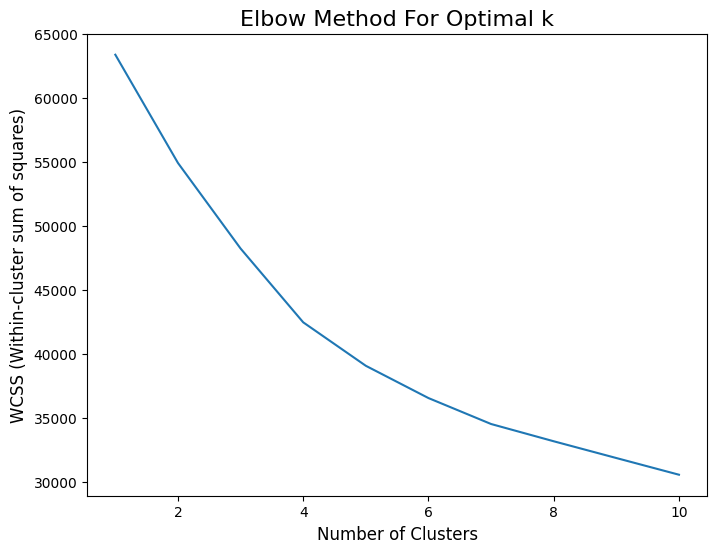

In [36]:
# ========================
# 8. Elbow Method for Optimal k
# ========================

# Find the optimal number of clusters using the Elbow Method
wcss = []  # List to store WCSS (Within-cluster sum of squares)
for i in range(1, 11):  # Try cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plotting the Elbow Method to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method For Optimal k", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("WCSS (Within-cluster sum of squares)", fontsize=12)
plt.show()


In [37]:
# ========================
# 9. Apply K-Means with Optimal k
# ========================

# Apply K-Means with the optimal k (based on the elbow plot, let's choose k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

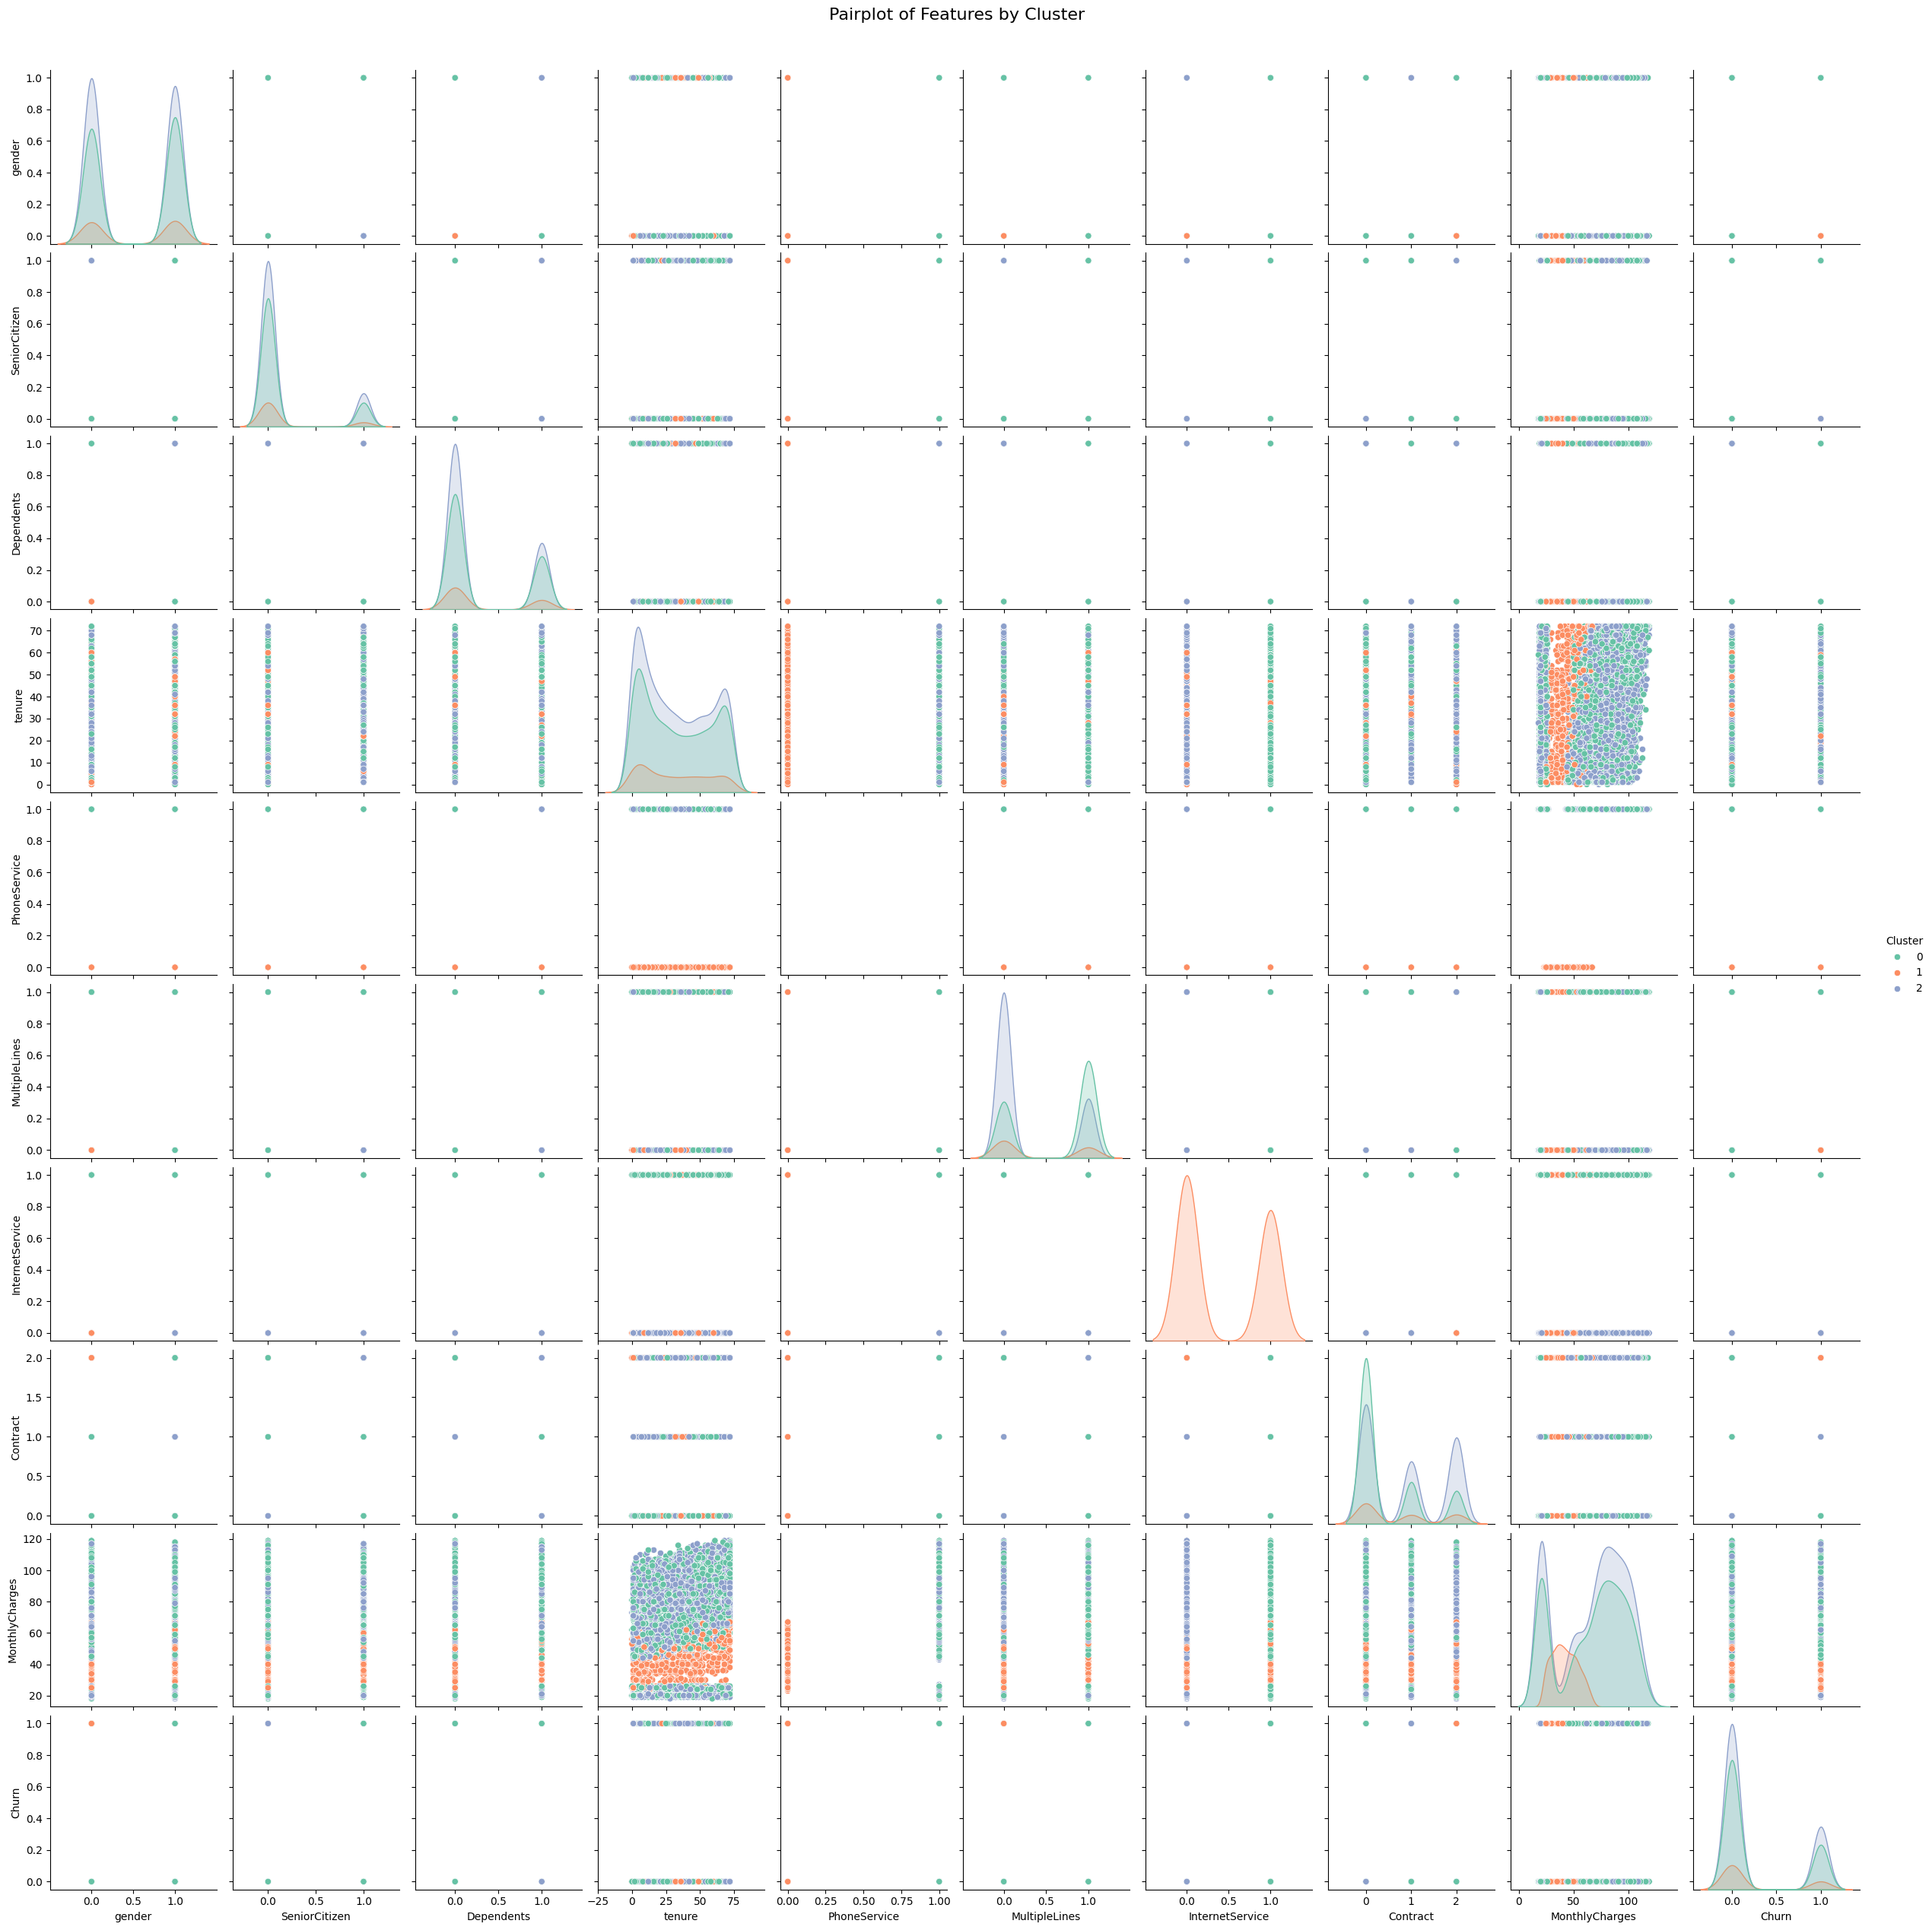

In [38]:
# ========================
# 10. Cluster Visualization (Pairplot)
# ========================

# Visualize the clusters using a pairplot (showing relationships between pairs of features)
sns.pairplot(df, hue='Cluster', vars=df.columns[:-1], palette='Set2')
plt.suptitle("Pairplot of Features by Cluster", y=1.02, fontsize=16)
plt.show()

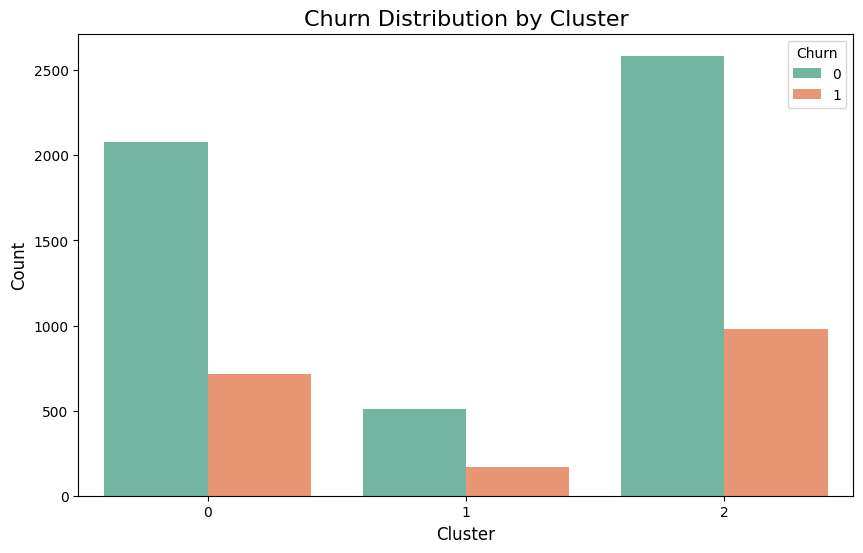

In [39]:
# ========================
# 12. Visualize Churn by Cluster
# ========================

# Visualize churn distribution by cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Churn', data=df, palette='Set2')
plt.title("Churn Distribution by Cluster", fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.show()



Churn Rate by Cluster:
Churn           0         1
Cluster                    
0        0.743113  0.256887
1        0.750733  0.249267
2        0.724902  0.275098

High-Risk Customers (Cluster 0):
Total high-risk customers: 2795

Retention Strategy for High-Risk Cluster:
1. Target with personalized offers or discounts.
2. Send customized emails emphasizing benefits for long-term customers.
3. Consider loyalty programs for long-term retention.


/tmp/ipython-input-3784591908.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=high_risk_cluster, palette='Set2')


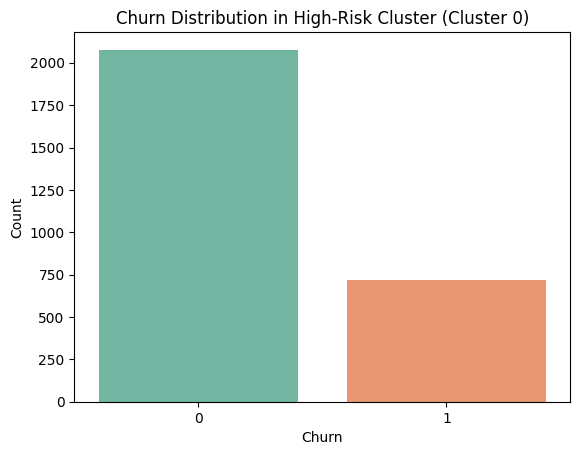

In [40]:
# ========================
# 1. Business Strategy: Churn Analysis by Cluster
# ========================

# Grouping by cluster and analyzing churn rates
cluster_churn = df.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print("\nChurn Rate by Cluster:")
print(cluster_churn)

# Identifying High-Risk / High-Value clusters (e.g., cluster with higher churn rates)
# Let's assume Cluster 0 has the highest churn rate; we can target this cluster with retention strategies
high_risk_cluster = df[df['Cluster'] == 0]

# Display strategy based on cluster
print(f"\nHigh-Risk Customers (Cluster 0):")
print(f"Total high-risk customers: {high_risk_cluster.shape[0]}")

# Business strategy for high-risk, high-value customers
print("\nRetention Strategy for High-Risk Cluster:")
print("1. Target with personalized offers or discounts.")
print("2. Send customized emails emphasizing benefits for long-term customers.")
print("3. Consider loyalty programs for long-term retention.")

# Example: Show the distribution of churn in high-risk cluster
sns.countplot(x='Churn', data=high_risk_cluster, palette='Set2')
plt.title("Churn Distribution in High-Risk Cluster (Cluster 0)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the data (use all columns except 'Churn' for features)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable (Churn)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================
# 7. ANN Model with Improved Architecture
# ========================

# Build the ANN model with improvements
model = Sequential()

# Add input layer with batch normalization
model.add(Dense(units=512, activation='relu', input_dim=X_train_scaled.shape[1]))  # Increased neurons in the first hidden layer
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to reduce overfitting (increased rate)

# Add a second hidden layer with more neurons
model.add(Dense(units=256, activation='relu'))  # Increased neurons in the second hidden layer
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to reduce overfitting (increased rate)

# Add a third hidden layer with more neurons
model.add(Dense(units=128, activation='relu'))  # Third hidden layer with more neurons
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to reduce overfitting

# Add output layer for binary classification (Churn prediction)
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification (0 or 1)

# Compile the model with Adam optimizer (with learning rate decay)
optimizer = Adam(learning_rate=0.0001)  # Even lower learning rate for better convergence
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# ========================
# Early Stopping Callback
# ========================
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with class weights (if needed) and early stopping
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.5621 - loss: 0.9156 - val_accuracy: 0.7530 - val_loss: 0.4948
Epoch 2/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6534 - loss: 0.7316 - val_accuracy: 0.7502 - val_loss: 0.4895
Epoch 3/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6816 - loss: 0.6501 - val_accuracy: 0.7700 - val_loss: 0.4771
Epoch 4/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6997 - loss: 0.6145 - val_accuracy: 0.7672 - val_loss: 0.4785
Epoch 5/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7144 - loss: 0.6045 - val_accuracy: 0.7601 - val_loss: 0.4808
Epoch 6/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7243 - loss: 0.5934 - val_accuracy: 0.7551 - val_loss: 0.4827
Epoch 7/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7267 - loss: 0.5678 - val_accuracy: 0.7601 - val_loss: 0.4769
Epoch 8/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7412 - loss: 0.5474 - val

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7777 - loss: 0.4565

Test Accuracy: 0.7750


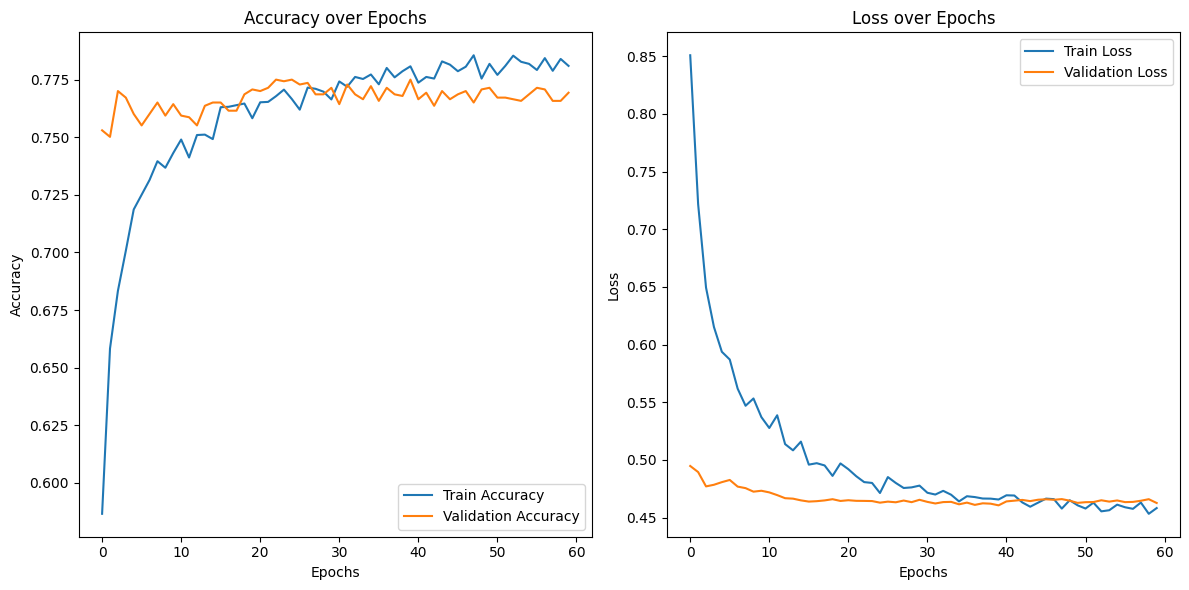

In [44]:
# ========================
# 8. Model Evaluation
# ========================

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training & validation accuracy/loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7777 - loss: 0.4565

Test Accuracy: 0.7750
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


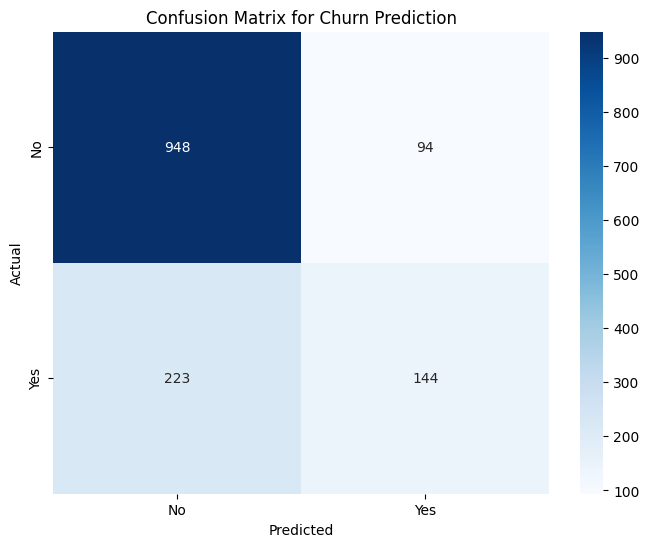


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.81      0.91      0.86      1042
       Churn       0.61      0.39      0.48       367

    accuracy                           0.78      1409
   macro avg       0.71      0.65      0.67      1409
weighted avg       0.76      0.78      0.76      1409



In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ========================
# 11. Model Evaluation
# ========================

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# ========================
# Confusion Matrix
# ========================

# Predict the churn labels for the test set
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix for Churn Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ========================
# Classification Report
# ========================

# Print classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))


In [46]:
df_ohe = pd.get_dummies(
    df,
    columns=['gender', 'PhoneService', 'MultipleLines',
             'InternetService', 'Contract', 'Dependents'],
    drop_first=True
)

X = df_ohe.drop('Churn', axis=1)
y = df_ohe['Churn']


In [47]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: np.float64(0.6817521781219749), 1: np.float64(1.8754993342210386)}


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


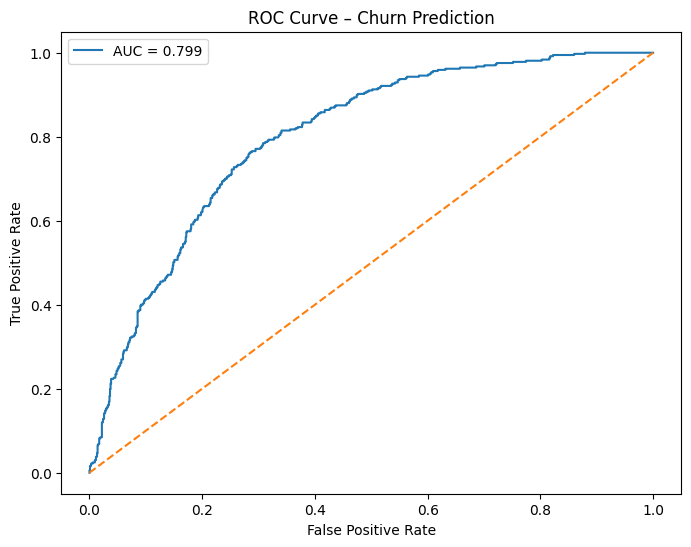

In [48]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict(X_test_scaled)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Churn Prediction')
plt.legend()
plt.show()


In [49]:
threshold = 0.4
y_pred_custom = (y_prob > threshold).astype(int)

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1042
           1       0.54      0.53      0.53       367

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.76      0.76      1409



In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_lr = lr.predict(X_test_scaled)
print(classification_report(y_test, y_lr))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1042
           1       0.59      0.46      0.52       367

    accuracy                           0.78      1409
   macro avg       0.71      0.67      0.69      1409
weighted avg       0.76      0.78      0.77      1409



In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
print(classification_report(y_test, y_rf))


              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1042
           1       0.52      0.42      0.46       367

    accuracy                           0.75      1409
   macro avg       0.66      0.64      0.65      1409
weighted avg       0.73      0.75      0.74      1409

